<a href="https://colab.research.google.com/github/NithinNarayanan07/Context-Based-Image-Annotation/blob/main/CBIR_Annotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from skimage import transform
from skimage import data
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from skimage.color import rgb2gray
import random
import tensorflow as tf

In [31]:
import cv2
from pylab import *
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/watering_0.jpg",flags=0)  
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img,(3,3), sigmaX=0, sigmaY=0) 


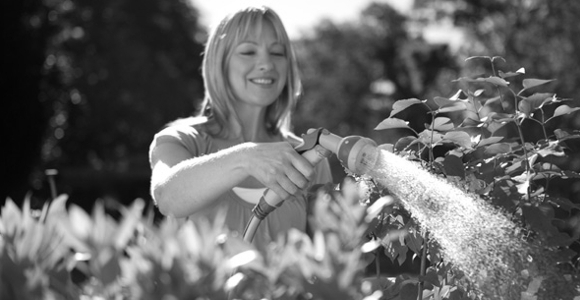

In [32]:
image=cv2.imread("/content/watering_0.jpg",flags=0)
cv2_imshow(image)

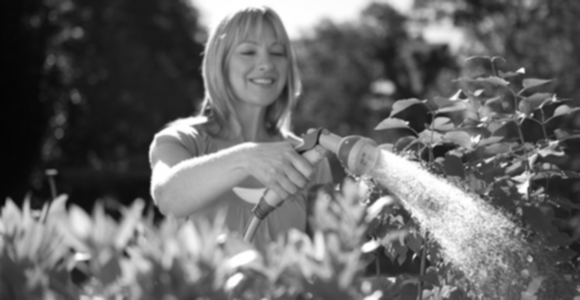

In [33]:
cv2_imshow(img_blur)

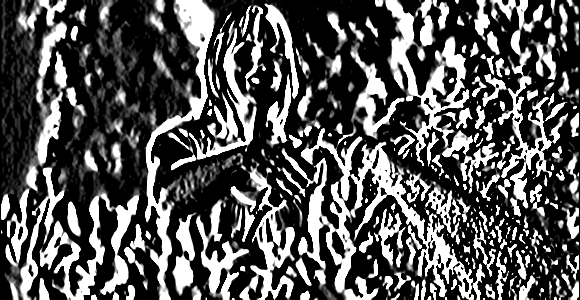

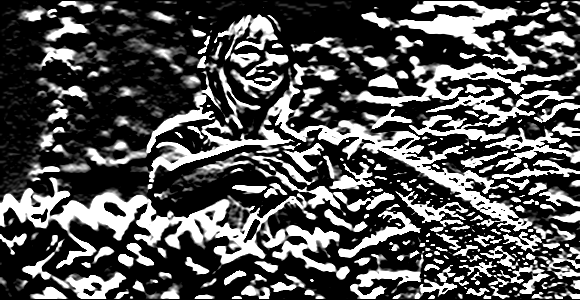

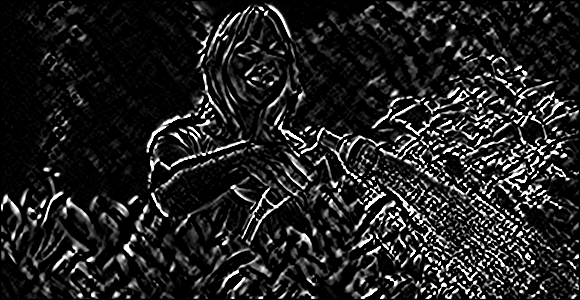

In [34]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

# Display Sobel Edge Detection Images
cv2_imshow(sobelx)


cv2_imshow(sobely)


cv2_imshow(sobelxy)


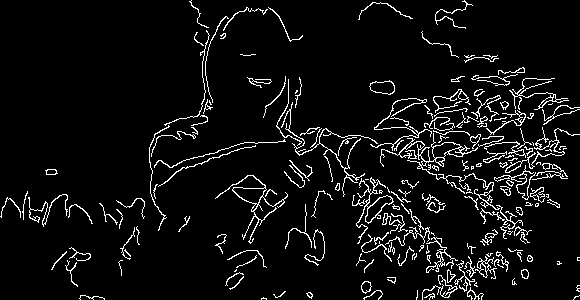

In [35]:
edges = cv2.Canny(image=img_blur, threshold1=100  , threshold2=250)
# Display Canny Edge Detection Image
cv2_imshow(edges)


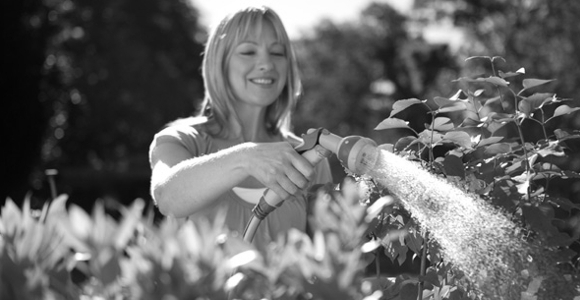

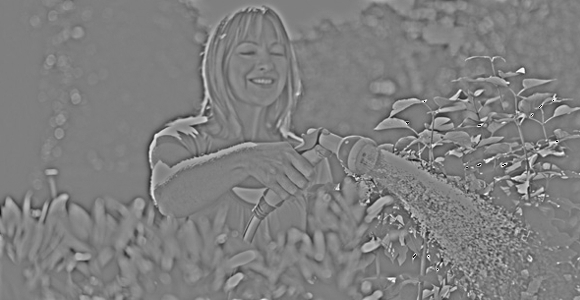

In [36]:
hpf = img - cv2.GaussianBlur(img, (21, 21), 3)+127
cv2_imshow(img)
cv2_imshow(hpf)

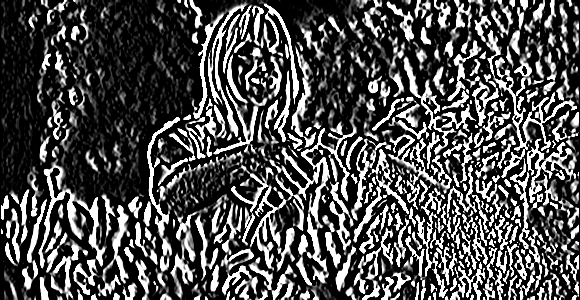

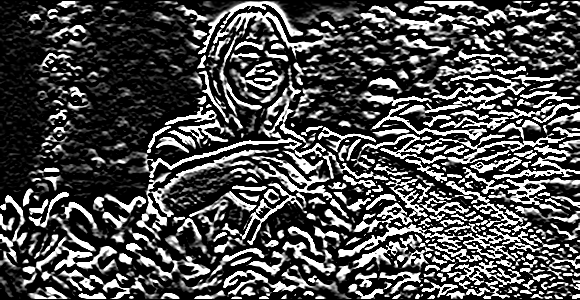

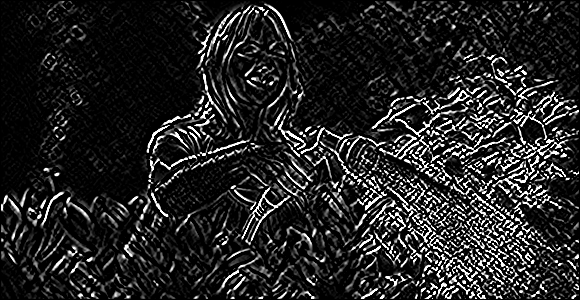

In [37]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=hpf, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=hpf, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=hpf, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

# Display Sobel Edge Detection Images
cv2_imshow(sobelx)


cv2_imshow(sobely)


cv2_imshow(sobelxy)


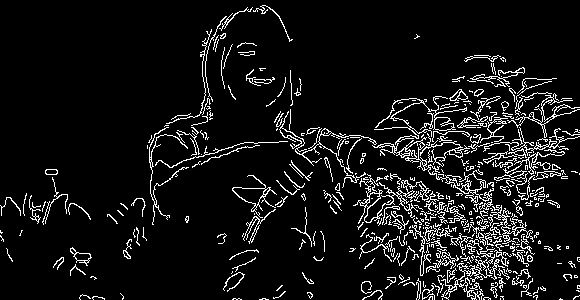

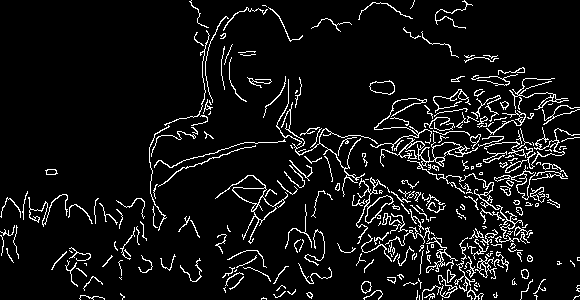

In [50]:
edges = cv2.Canny(image=hpf, threshold1=100, threshold2=200)
edges1 = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
 
cv2_imshow(edges)
cv2_imshow(edges1)

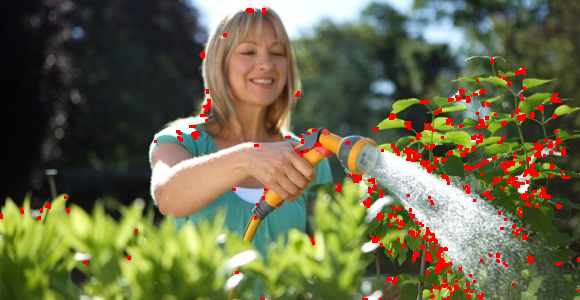

In [39]:

import cv2
from pylab import *
from google.colab.patches import cv2_imshow
import numpy as np

def Harris_Corner(img):



  # # convert the input image into
  # # grayscale color space
  operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # # modify the data type
  # # setting to 32-bit floating point
  operatedImage = np.float32(operatedImage)

  # # apply the cv2.cornerHarris method
  # # to detect the corners with appropriate
  # # values as input parameters
  dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07)

  # Results are marked through the dilated corners
  dest = cv2.dilate(dest, None)

  image[dest > 0.01 * dest.max()]=[0, 0, 255]
  return image
  # cv2_imshow(image)
image = cv2.imread('/content/watering_0.jpg')
image=Harris_Corner(image)
cv2_imshow(image)

In [40]:
pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
import cv2
sift = cv2.xfeatures2d.SIFT_create()

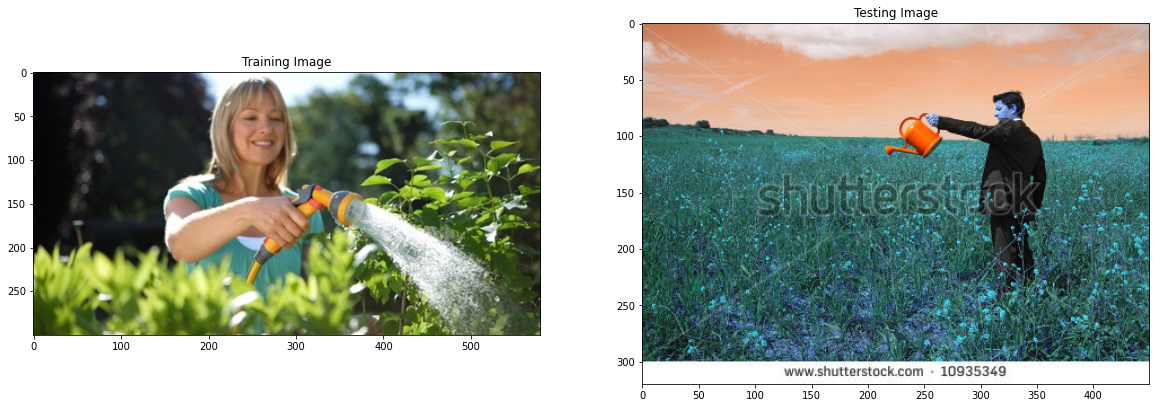

In [43]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load the image
image1 = cv2.imread('/content/watering_0.jpg')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)
test_image=cv2.imread('/content/watering_32.jpg')
# # Create test image by adding Scale Invariance and Rotational Invariance
# test_image = cv2.pyrDown(training_image)
# test_image = cv2.pyrDown(test_image)
# num_rows, num_cols = test_image.shape[:2]

# rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
# test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

Number of Keypoints Detected In The Training Image:  1236
Number of Keypoints Detected In The Query Image:  991


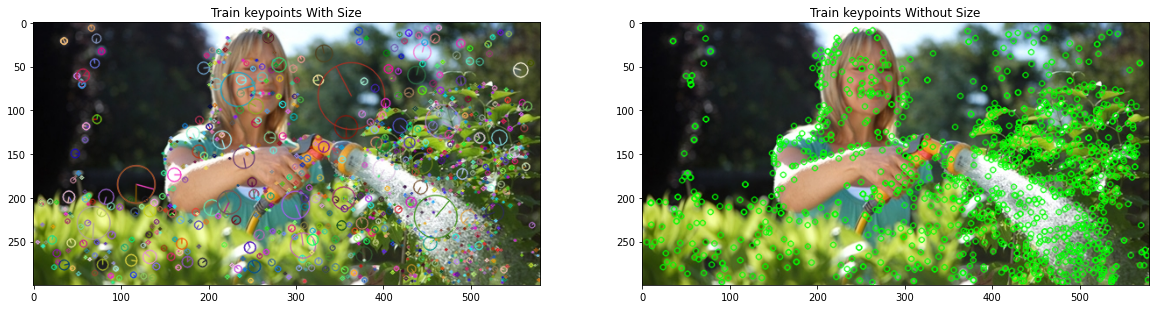

In [44]:
sift = cv2.xfeatures2d.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

Number of Keypoints Detected In The Training Image:  2730
Number of Keypoints Detected In The Query Image:  6236


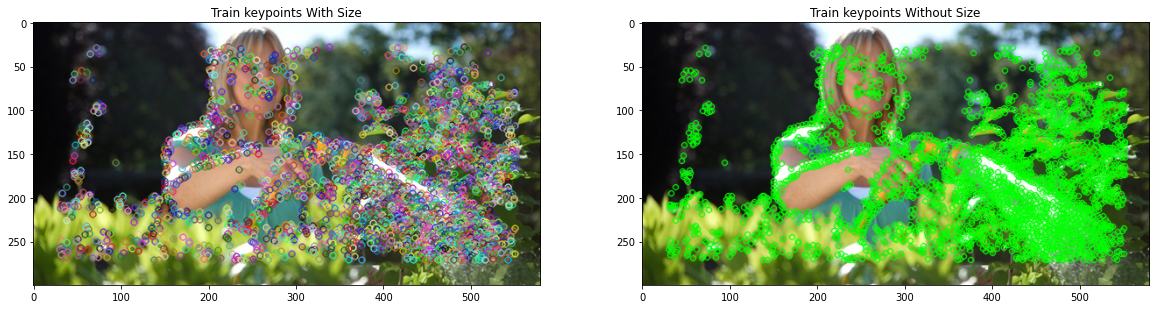

In [45]:


fast = cv2.FastFeatureDetector_create() 
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()


train_keypoints = fast.detect(training_gray, None)
test_keypoints = fast.detect(test_gray, None)

train_keypoints, train_descriptor = brief.compute(training_gray, train_keypoints)
test_keypoints, test_descriptor = brief.compute(test_gray, test_keypoints)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

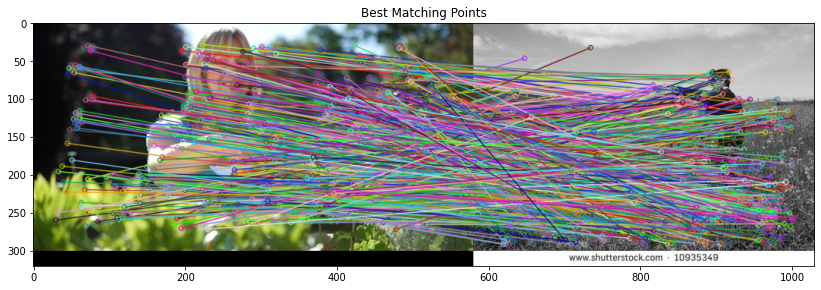


Number of Matching Keypoints Between The Training and Query Images: 663


In [46]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the BRIEF descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images:",len(matches))

In [47]:
#####into doing about it in this scenario all about
matches = bf.match(train_descriptor, test_descriptor)
good=[]
count=0
for i, m in enumerate(matches):
    if i < len(matches) - 1 and m.distance < 0.7 * matches[i+1].distance:
        good.append(m)
    count+=1
len(good)

71